In [2]:
import numpy as np
#import tensorflow as tf
from utility import *
import matplotlib.pyplot as plt
from matplotlib import colors
import os
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/bzr0014/anaconda3/envs/tensorGpu/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
root = "./"
nss_low = np.load("%s/length_low_res.npy"%root)
nss_high = np.load("%s/length_high_res.npy"%root)
mit_low = np.load("%s/mit_low_res.npy"%root)
mit_high = np.load("%s/mit_high_res.npy"%root)
#mit_low = np.log(mit_low + 1)
#mit_high = np.log(mit_high + 1)
mit_low = (mit_low - mit_low.mean()) / mit_low.std()
mit_high = (mit_high - mit_high.mean()) / mit_high.std()

(6084, 6084)


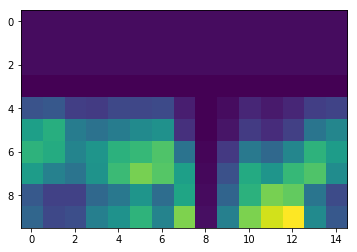

*******************************************


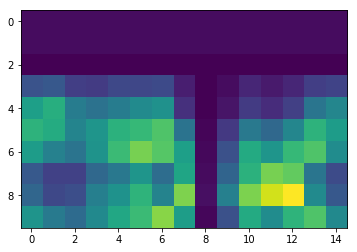

*******************************************


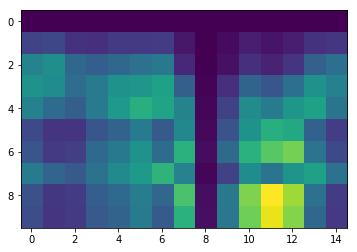

*******************************************


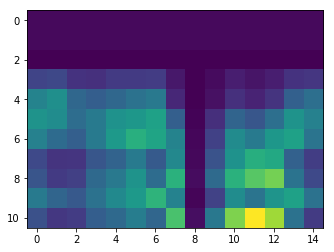

*******************************************


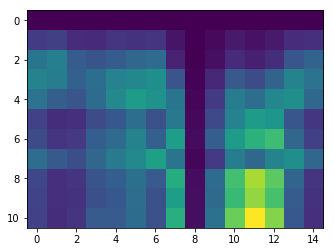

*******************************************


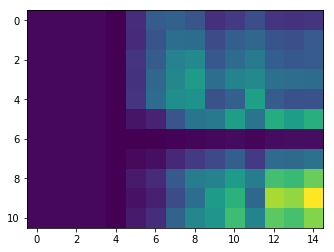

*******************************************


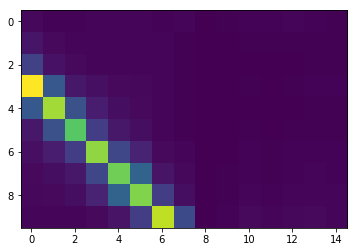

*******************************************


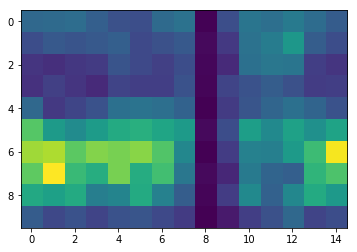

*******************************************


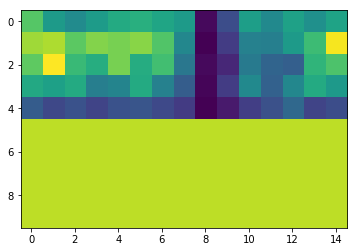

*******************************************


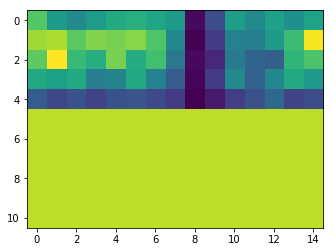

*******************************************


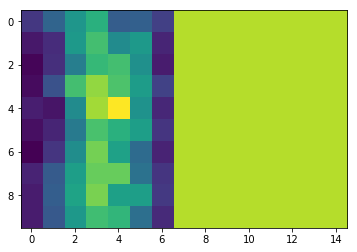

In [70]:
print(mit_high.shape)
image = findPixelNeighbor(2, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(3, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(5, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(3, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(5, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(25, 3, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(20, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6078, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6083, 25, 10, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(6083, 25, 11, 15, mit_high)
plt.imshow(image)
plt.show()
print("*******************************************")
image = findPixelNeighbor(20, 6083, 10, 15, mit_high)
plt.imshow(image)
plt.show()

expected:  9 15
actual: 9 15 135


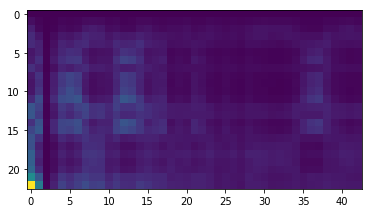

In [13]:
xend = 210
yend = 402
nx = 23
ny = 43
sx = 23
sy = 24
input = mit_high[:xend, :yend]
cropped, cache = cropNeighbors(input, nx, ny, sx, sy)
plt.imshow(cropped[1])

207 379


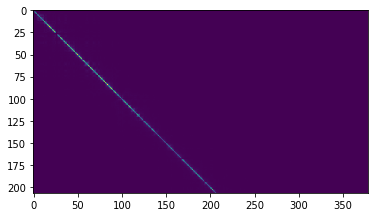

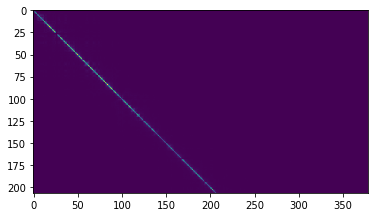

(array([], dtype=int64), array([], dtype=int64))
(207, 379)
(207, 379)


In [15]:
reconstructed, cache = reconstruct(cropped, cache)
w, h, nx, ny, sx, sy, lpx, lpy, c1, c2 = cache
halfSizeX = nx // 2
xRemainder = nx % 2
halfSizeY = ny // 2
yRemainder = ny % 2
print(lpx, lpy)
input = input[:lpx, :lpy]
reconstructed = reconstructed[:lpx, :lpy]
plt.imshow(reconstructed)
plt.show()
plt.imshow(input)
plt.show()
nonEqual = np.where(input != reconstructed)
print(nonEqual)
print(input.shape)
print(reconstructed.shape)

In [16]:
outLow, outHigh, cache = loadData(40, 40, 23, 23)
print(outLow.shape)
print(outHigh.shape)

Starting to load data...
expected:  20 20
actual: 20 20 400
expected:  20 20
actual: 20 20 400
expected:  20 20
actual: 20 20 400
expected:  20 20
actual: 20 20 400
expected:  16 16
actual: 16 16 256
expected:  16 16
actual: 16 16 256
expected:  15 15
actual: 15 15 225
expected:  15 15
actual: 15 15 225
expected:  15 15
actual: 15 15 225
expected:  15 15
actual: 15 15 225
expected:  14 14
actual: 14 14 196
expected:  14 14
actual: 14 14 196
expected:  13 13
actual: 13 13 169
expected:  13 13
actual: 13 13 169
expected:  12 12
actual: 12 12 144
expected:  12 12
actual: 12 12 144
expected:  11 11
actual: 11 11 121
expected:  11 11
actual: 11 11 121
expected:  11 11
actual: 11 11 121
expected:  11 11
actual: 11 11 121
expected:  10 10
actual: 10 10 100
expected:  10 10
actual: 10 10 100
expected:  10 10
actual: 10 10 100
expected:  10 10
actual: 10 10 100
expected:  9 9
actual: 9 9 81
expected:  9 9
actual: 9 9 81
expected:  8 8
actual: 8 8 64
expected:  8 8
actual: 8 8 64
expected:  8 8


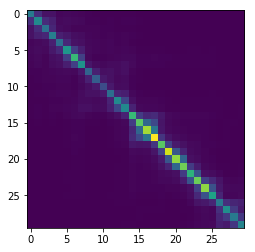

In [17]:
chr1 = 2
chr2 = 2
begX = nss_high[chr1, 0]
endX = nss_high[chr1, 0] + nss_high[chr1, 1]
begY = nss_high[chr2, 0]
endY = nss_high[chr2, 0] + nss_high[chr2, 1]
plt.imshow(mit_high[begX:endX, begY:endY][:30, :30])

(3,)


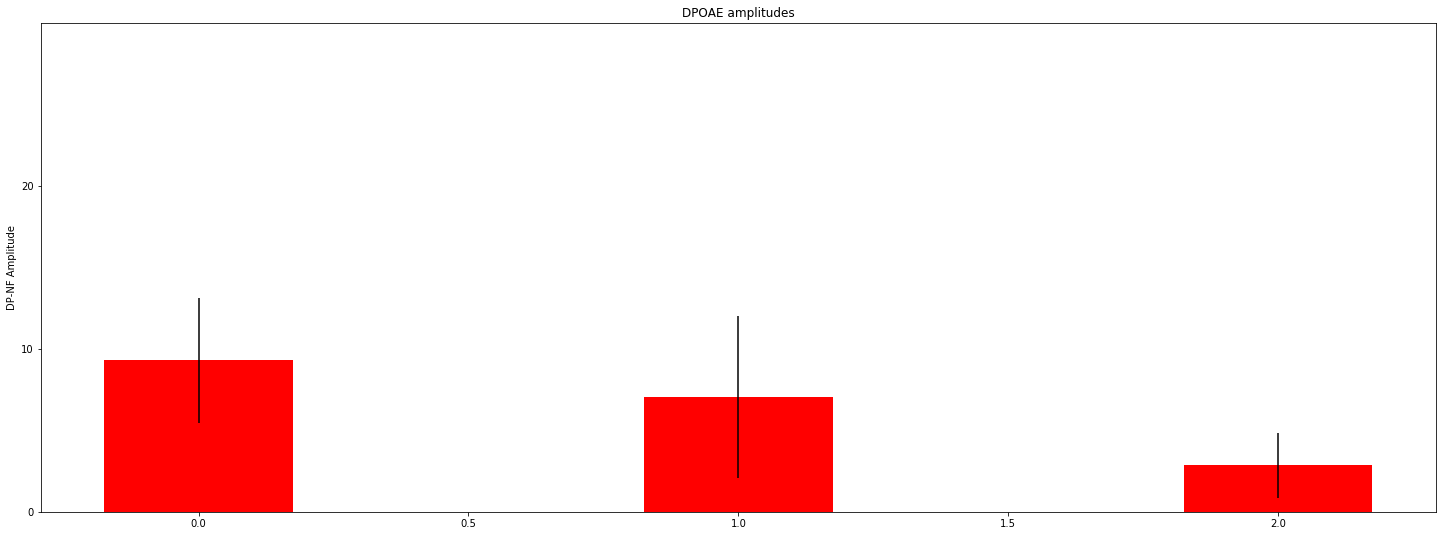

In [8]:
pylab.rcParams['figure.figsize'] = (25, 9)
N = 3
menMeans = np.array([9.29, 7.04, 2.84])
menStd = np.array([3.85, 4.96, 1.97])
print(menStd.shape)
# the x locations for the groups
ind = np.arange(N)    
# the width of the bars
width = 0.35      
ax = plt.subplot(1, 1, 1)
for i in range(len(menMeans)):
    p1 = ax.bar(i, menMeans[i], width, yerr=menStd[i], color='red')
ax.set_ylim([0, 30])
ax.set_ylabel('DP-NF Amplitude')
ax.set_title('DPOAE amplitudes')
ax.set_yticks(np.arange(0, 25, 10))

plt.show()